# 1) Basics

We'll be using three important open source softwares:

    1) The Python programing language: www.python.org
    2) Jupyter notebooks: www.jupyter.org
    3) The networkX library for networks: https://networkx.github.io/

- visit all the webpages above, get familiar with Python and Jupyter notebooks
- install jupyter notebooks in your laptop and start playing with python 3



In [1]:
#assign value
x = 3
y = "Hello World"

#print
print(y)

Hello World


In [3]:
#list
z = [0,1,2,3,4,5]
print(z[0])

#dict
w = {"HD":85,"P":50}
print(w["HD"])

0
85


In [4]:
#loop
for i in z:
    if i > x:
        print(">",str(x))
    else:
        print(i)

0
1
2
3
> 3
> 3


# 2) Data: Protein-protein interaction networks

- The protein-protein interaction network of Yeast *saccharomyces cerevisiae* has more than $6,000$ proteins. Proteins form physical complexes of $5$-$50$ proteins and there are roughly $100$-$200$ functional communities. 

- The gene HST1 (*standard name*) is also called YOL068C (*systematic name*), see https://www.yeastgenome.org for details

- the data can be dowloaded from https://string-db.org/cgi/network.pl?taskId=nhiAd00Ggrzi

# 3) Network in python

### Read in network

In [11]:
import networkx as nx

In [12]:
#local
#G_HST1=nx.read_weighted_edgelist("../Data/4932_protein_links_v11_0.txt",comments="#",nodetype=str)

#Ed
G_HST1=nx.read_weighted_edgelist("4932.protein.links.v11.0.txt",comments="#",nodetype=str)

In [13]:
# delete those edges with a combined score of <= thershold_score (small confidence)
threshold_score = 500
for edge in G_HST1.edges: 
    weight = list(G_HST1.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G_HST1.remove_edge(edge[0],edge[1])

### Basic proporty

In [16]:
G = G_HST1

#number of nodes of network
print('number of nodes of G:',G.number_of_nodes())

#number of edges of network
print('number of edges of G:',G.number_of_edges())

#degree of node '4932.YOL068C'(HST1 protein)
print("degree of target node: ",G.degree('4932.YOL068C'))

#neighbors of node '4932.YOL068C'(HST1 protein)
print(list(G.neighbors('4932.YBR160W'))[:5])

number of nodes of G: 6574
number of edges of G: 205190
degree of target node:  90
['4932.YAL005C', '4932.YAL009W', '4932.YAL012W', '4932.YAL019W', '4932.YAL024C']


### Largest connected component

In [17]:
print('Is the full G connected?',nx.connected.is_connected(G))
print('How many connected subgraphs are there?',nx.connected.number_connected_components(G))

#get the largest component
largest_cc = max(nx.connected_components(G),key=len)
Gc=G.subgraph(largest_cc)

print('number of nodes of G:',Gc.number_of_nodes())
print('number of edges of G:',Gc.number_of_edges())

Is the full G connected? False
How many connected subgraphs are there? 83
number of nodes of G: 6485
number of edges of G: 205183


### Shortest path

In [25]:
print("Shortest path between 4932.YOL068C and 4932.YNL097C:", nx.shortest_path(G, source='4932.YBR160W', target='4932.YNL097C'))
print("The shortest path length: ", nx.shortest_path_length(G, source='4932.YBR160W', target='4932.YNL097C'))

Shortest path between 4932.YOL068C and 4932.YNL097C: ['4932.YBR160W', '4932.YBR010W', '4932.YNL097C']
The shortest path length:  2


### Centrality Measure
- Degree
- Eigenvector
- Katz
- Betweenees
- Pagerank

In [41]:
measuresNames=["Degree","Eigenvector","Katz","Page Rank","Betweeness"]
listMeasures = [dict(nx.degree(G)),nx.eigenvector_centrality_numpy(G),nx.katz_centrality_numpy(G),nx.pagerank(G),nx.betweenness_centrality(G)]

for idx,dictMeasure in enumerate(listMeasures):
    top10 = [[dictMeasure[k],k] for k in dictMeasure.keys()] # Choose the 10 largest values
    top10.sort(reverse=True)
    print("\n Centrality Measure:",measuresNames[idx])
    for idx,pair in enumerate(top10[:10]):
        print(str(idx+1),": \t is node ",pair[1]," with value:\t",pair[0])


 Centrality Measure: Degree
1 : 	 is node  4932.YFL039C  with value:	 621
2 : 	 is node  4932.YLR167W  with value:	 527
3 : 	 is node  4932.YBR160W  with value:	 517
4 : 	 is node  4932.YKR094C  with value:	 515
5 : 	 is node  4932.YLL039C  with value:	 499
6 : 	 is node  4932.YLL053C  with value:	 494
7 : 	 is node  4932.YKL009W  with value:	 479
8 : 	 is node  4932.YDL014W  with value:	 470
9 : 	 is node  4932.YDL208W  with value:	 467
10 : 	 is node  4932.YNL178W  with value:	 459

 Centrality Measure: Eigenvector
1 : 	 is node  4932.YKL009W  with value:	 0.07871311825645869
2 : 	 is node  4932.YNL002C  with value:	 0.07530122261071169
3 : 	 is node  4932.YER126C  with value:	 0.07413682542962055
4 : 	 is node  4932.YHR148W  with value:	 0.0736937073745781
5 : 	 is node  4932.YLR009W  with value:	 0.0733329958326453
6 : 	 is node  4932.YJR123W  with value:	 0.07248244449834337
7 : 	 is node  4932.YNL178W  with value:	 0.07147911425409843
8 : 	 is node  4932.YCR031C  with value:	 0.

In [28]:
measuresNames=["Degree","Eigenvector","Katz","Page Rank"]
listMeasures = [dict(nx.degree(G)),nx.eigenvector_centrality_numpy(G),nx.katz_centrality_numpy(G),nx.pagerank(G)]

for measure in listMeasures:
    for key,value in measure.items():
        print(key)


TypeError: cannot unpack non-iterable int object

### Create new network

In [7]:
G0 = nx.empty_graph()

G0.add_node(0)
G0.add_node(1)
G0.add_node(2)

G0.add_edge(0,1)
G0.add_edge(0,2)
G0.add_edge(1,2)

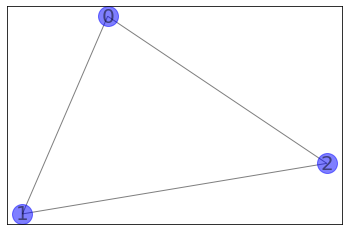

In [10]:
nx.draw_networkx(G0, node_size=400, alpha=0.5, node_color="blue", font_size='20',with_labels=True)
plt.show()

### Simple plot

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt 
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
Gk = nx.karate_club_graph()

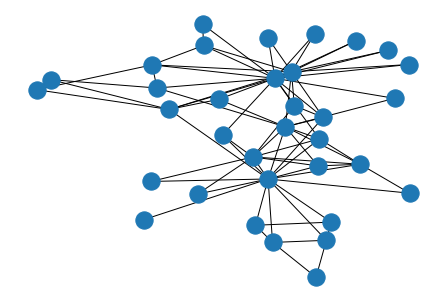

In [45]:
nx.draw(Gk)

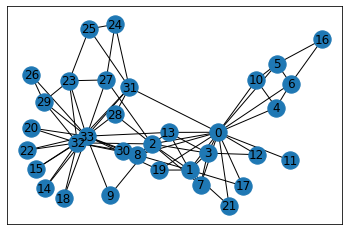

In [50]:
nx.draw_networkx(Gk)
plt.show()

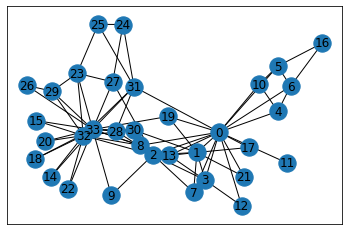

In [51]:
nx.draw_networkx(Gk,pos=nx.spring_layout(Gk))
plt.show()

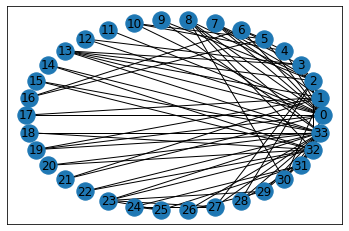

In [52]:
nx.draw_networkx(Gk,pos=nx.circular_layout(Gk))
plt.show()

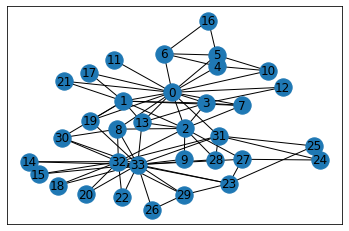

In [53]:
nx.draw_networkx(Gk,pos=nx.kamada_kawai_layout(Gk))
plt.show()

In [106]:
?nx.draw_networkx

# 4) Linear Algebra

In [11]:
import numpy as np
import random
from numpy.linalg import matrix_power
from numpy.linalg import eig

In [12]:
np.random.randint(13)

11

In [14]:
#random vector
a = np.random.rand(3)
a

array([0.44114311, 0.90400371, 0.41297954])

In [74]:
#matrix
A = np.array([[ 5, 1 ,3], [ 1, 1 ,1], [ 1, 2 ,1]])
A

array([[5, 1, 3],
       [1, 1, 1],
       [1, 2, 1]])

### Vector multiplication

In [75]:
A.dot(a)

array([44, 16, 22])

### Matrix power

Raise a square matrix to the (integer) power n

In [76]:
matrix_power(A, 2)

array([[29, 12, 19],
       [ 7,  4,  5],
       [ 8,  5,  6]])

# 5) Your turn!

### 1). Porperty of G_HST1
Use the protein network and finish the following tasks
- How many nodes you have in the network?
- Which node has the largest number of neighbours (largest degree)?
- Plot the network (do at home)

### 2). Convergence of adjacency matrix

Use the matrix A

- Generate a random 4-dimensional column vector, b
- Apply A to the vector and record the output
- Apply A^n to the vector and record the output for n=1,2,3,4,5,6. What do you observe?

In [ ]:
A = np.random.rand(4,4)
A = A+A.transpose()
A

Use another matrix A. What do you observe this time and why?

In [ ]:
A = np.array([[ 0, 1 ,0 ,0], [ 1, 0 ,0 ,1], [ 0, 0 ,0 ,1],[0 , 1, 1, 0]])
A

python help

In [18]:
#find the adjacency matrix of a network
G0_Ad = nx.adjacency_matrix(G0, nodelist=None, weight=None)
G0_Ad.todense()

matrix([[0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]], dtype=int64)

In [39]:
#sort a list of tuples so that the tuples second values are in descending order
list_of_tuples = [(0,0),(1,3),(2,1)]
list_of_tuples.sort(key=lambda x:x[1],reverse = True)
list_of_tuples

[(1, 3), (2, 1), (0, 0)]

In [105]:
#Compute the eigenvalues and right eigenvectors of a square array
eig(A);
#Matrix or vector norm
np.linalg.norm(x);